In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import InputLayer, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, MaxPool2D

from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, RandomZoom, RandomContrast, RandomTranslation

In [2]:
def read_images(directory_path):
    images = []
    labels = []

    subdirectories = [subdir for subdir in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, subdir))]

    for subdir in subdirectories:
        subdirectory_path = os.path.join(directory_path, subdir)

        for filename in os.listdir(subdirectory_path):
                image_path = os.path.join(subdirectory_path, filename)
                image = cv2.imread(image_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Conversion couleur RGB
                image = cv2.resize(image, (60, 60))  # Taille des images en 60x60 pixels
                images.append(image)

                label = int(subdir)
                labels.append(label)

    X = np.array(images)
    y = np.array(labels)
    
    return X, y

In [4]:
X, y = read_images('C:/Users/kjh/Downloads/Train')


In [5]:

Classes = ['Speed limit (20km/h)','Speed limit (30km/h)', 'Speed limit (50km/h)', 
           'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 
           'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 
           'No passing', 'No passing veh over 3.5 tons', 'Right-of-way at intersection', 
           'Priority road', 'Yield', 'Stop', 'No vehicles', 'Veh > 3.5 tons prohibited', 
           'No entry', 'General caution', 'Dangerous curve left', 'Dangerous curve right', 
           'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 
           'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 
           'Bicycles crossing', 'Beware of ice/snow','Wild animals crossing', 
           'End speed + passing limits', 'Turn right ahead', 'Turn left ahead', 
           'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 
           'Keep left', 'Roundabout mandatory', 'End of no passing', 
           'End no passing veh > 3.5 tons']


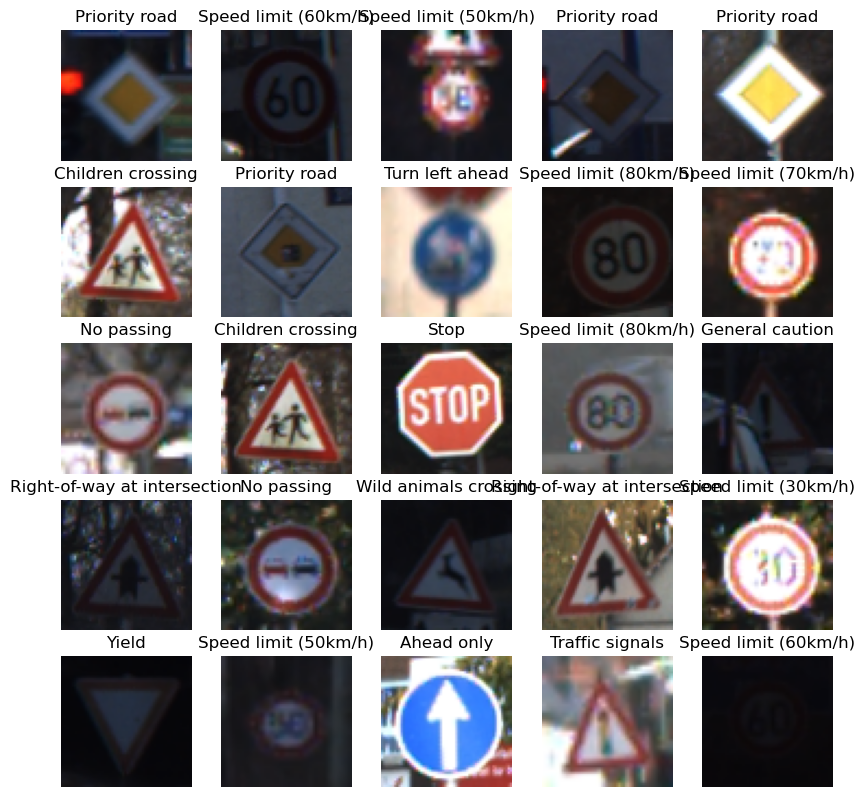

In [6]:
import random
plt.figure(figsize=(10,20))
for i in range(0,25) :
    plt.subplot(10,5,i+1)
    j = random.randint(0,len(X))
    plt.axis('off')
    plt.imshow(X[j])
    plt.title(Classes[y[j]])
    #plt.title(y[j])

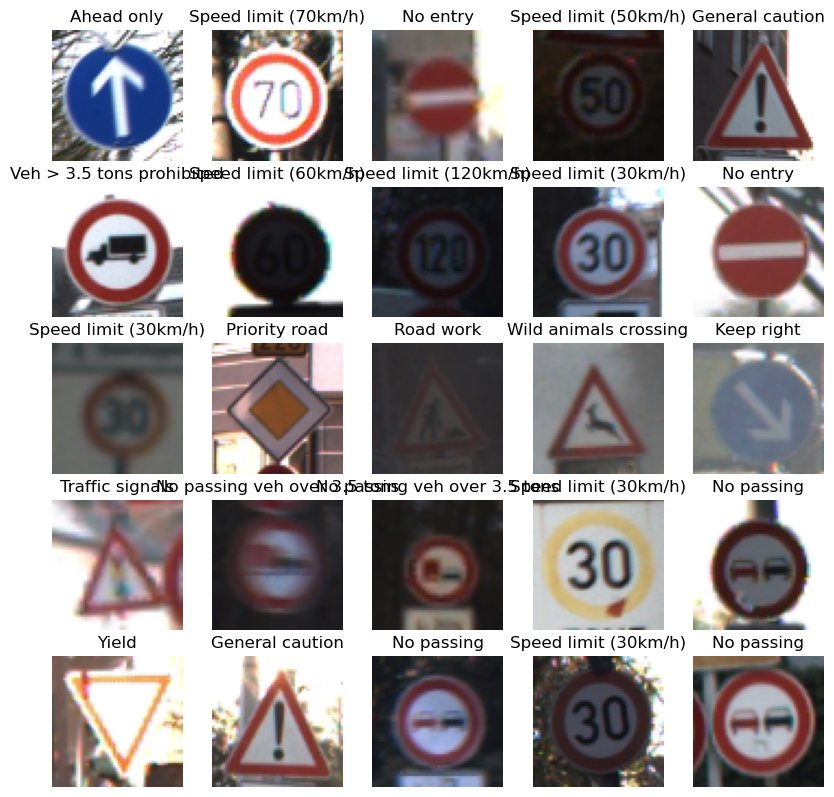

In [7]:
import random
plt.figure(figsize=(10,20))
for i in range(0,25) :
    plt.subplot(10,5,i+1)
    j = random.randint(0,len(X))
    plt.axis('off')
    plt.imshow(X[j])
    plt.title(Classes[y[j]])
    #plt.title(y[j])

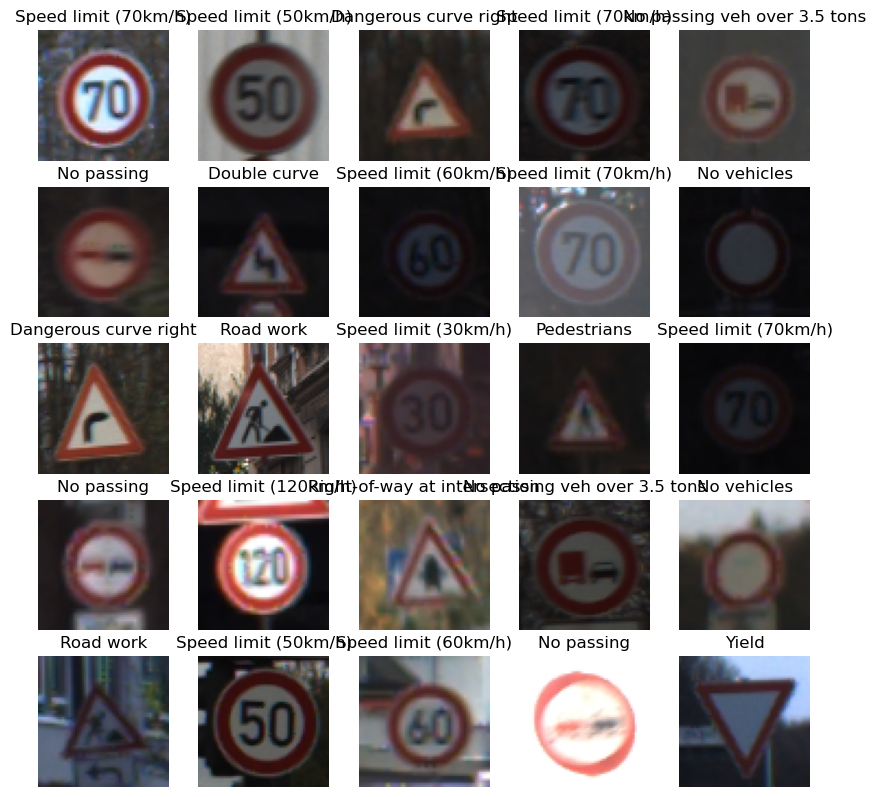

In [8]:
import random
plt.figure(figsize=(10,20))
for i in range(0,25) :
    plt.subplot(10,5,i+1)
    j = random.randint(0,len(X))
    plt.axis('off')
    plt.imshow(X[j])
    plt.title(Classes[y[j]])
    #plt.title(y[j])

In [9]:
Nombre_classes = len(Classes) # 43 classes

In [10]:
print(Nombre_classes)

43


In [11]:
for i in range(Nombre_classes):
    print(str((y == i).sum()) + ' éléments dans la classe ' + str(i) + ' : ' + str(Classes[i]))

210 éléments dans la classe 0 : Speed limit (20km/h)
2220 éléments dans la classe 1 : Speed limit (30km/h)
2250 éléments dans la classe 2 : Speed limit (50km/h)
1410 éléments dans la classe 3 : Speed limit (60km/h)
1980 éléments dans la classe 4 : Speed limit (70km/h)
1860 éléments dans la classe 5 : Speed limit (80km/h)
420 éléments dans la classe 6 : End of speed limit (80km/h)
1440 éléments dans la classe 7 : Speed limit (100km/h)
1410 éléments dans la classe 8 : Speed limit (120km/h)
1470 éléments dans la classe 9 : No passing
2010 éléments dans la classe 10 : No passing veh over 3.5 tons
1320 éléments dans la classe 11 : Right-of-way at intersection
2100 éléments dans la classe 12 : Priority road
2160 éléments dans la classe 13 : Yield
780 éléments dans la classe 14 : Stop
630 éléments dans la classe 15 : No vehicles
420 éléments dans la classe 16 : Veh > 3.5 tons prohibited
1110 éléments dans la classe 17 : No entry
1200 éléments dans la classe 18 : General caution
210 éléments d

In [12]:
y = to_categorical(y)

In [13]:
X.shape

(39209, 60, 60, 3)

In [14]:
# Normalisation entre 0 et 1
X = X / 255
# print(X[0][0])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [16]:
def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
    plt.plot(epochs, val_accuracy, 'r', label='Score validation')
    plt.title('Scores')
    plt.legend()
    plt.show()

In [17]:
# Modèle CNN plus profond
model = Sequential()
# model.add(Conv2D(32, (3, 3), input_shape=(30, 30, 3), activation='relu')) # si image de taille 30*30
model.add(Conv2D(32, (3, 3), input_shape=(60, 60, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(20, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(20, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(Nombre_classes, activation='softmax'))

In [18]:
# Compilation du modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 58, 58, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 29, 29, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 29, 29, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 20)        5780      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 20)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 20)        0

In [20]:
# Apprentissage
train = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, verbose=1)

Epoch 1/20
1103/1103 [==============================] - 197s 175ms/step - loss: 1.5745 - accuracy: 0.5444 - val_loss: 0.3744 - val_accuracy: 0.9031
Epoch 2/20
1103/1103 [==============================] - 190s 172ms/step - loss: 0.3845 - accuracy: 0.8841 - val_loss: 0.1720 - val_accuracy: 0.9594
Epoch 3/20
1103/1103 [==============================] - 189s 171ms/step - loss: 0.2266 - accuracy: 0.9332 - val_loss: 0.1048 - val_accuracy: 0.9768
Epoch 4/20
1103/1103 [==============================] - 172s 156ms/step - loss: 0.1667 - accuracy: 0.9492 - val_loss: 0.0840 - val_accuracy: 0.9806
Epoch 5/20
1103/1103 [==============================] - 154s 139ms/step - loss: 0.1333 - accuracy: 0.9603 - val_loss: 0.0763 - val_accuracy: 0.9821
Epoch 6/20
1103/1103 [==============================] - 169s 154ms/step - loss: 0.1096 - accuracy: 0.9662 - val_loss: 0.0578 - val_accuracy: 0.9888
Epoch 7/20
1103/1103 [==============================] - 176s 160ms/step - loss: 0.0994 - accuracy: 0.9701 - val_

In [22]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 99.62%


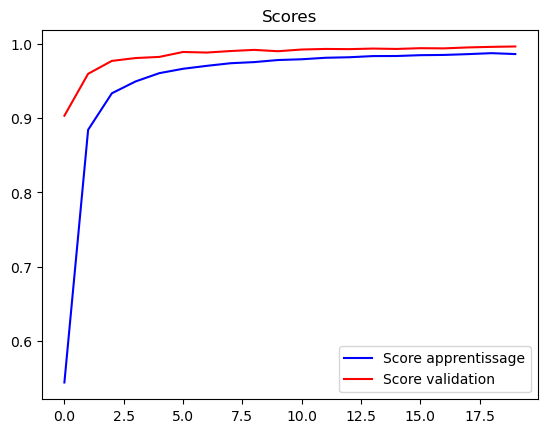

In [23]:
plot_scores(train)

In [27]:
model.save('modele_cnn_reconnaissance_panneaux_APR.h5')

C:\Users\kjh\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


TypeError: only integer scalar arrays can be converted to a scalar index

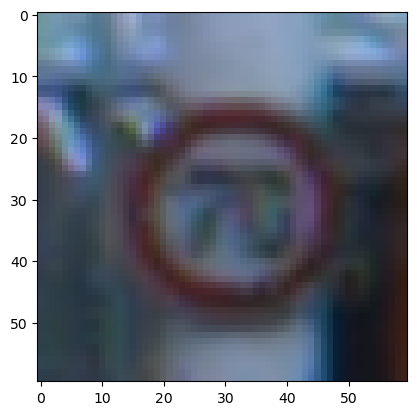

In [28]:
# faire le code pour afficher l'image choisie
plt.imshow(X_test[0])
plt.title(Classes[y[0]])

In [29]:
# L'image que l'on charge ici n'est pas dans la partie train du dataset donc pas de biais d'apprentissage

X_1image = []

# image = chemin vers l'image si on veut en importer une extérieure au dataset
# img = cv2.imread(image) # Lecture de l'image dans le repertoire
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Conversion couleur RGB
# img = cv2.resize(img, (60,60)) # Redimensionnement de l'image

img = X_test[0] # on peut aussi prendre une image de la partie test du dataset

X_1image.append(np.array(img)) # Conversion en tableau et ajout a la liste des images
X_1image = np.array(X_1image)
X_1image = X_1image/255

In [30]:
X_1image.shape

(1, 60, 60, 3)

In [31]:
liste_predictions = model.predict(X_1image)

1/1 [==============================] - 0s 264ms/step


In [32]:
liste_predictions

array([[1.2700733e-06, 2.0679825e-03, 5.2911980e-04, 1.3937713e-01,
        2.3448424e-02, 2.4054377e-01, 4.6549358e-05, 6.6243947e-02,
        9.1357730e-02, 1.9688653e-02, 7.3935434e-02, 4.1722055e-03,
        1.9730718e-03, 4.4829524e-03, 1.4568854e-02, 9.3713170e-06,
        2.3473649e-04, 1.9133574e-01, 2.1610437e-02, 2.6569596e-02,
        1.2587519e-04, 1.7007492e-03, 1.9384055e-05, 1.1305681e-02,
        5.6019512e-06, 2.9658636e-02, 4.0402266e-04, 2.5988561e-06,
        1.3188123e-03, 4.1440214e-04, 1.0646778e-03, 2.0797435e-02,
        9.5231214e-04, 2.1832439e-03, 6.9302929e-05, 3.4345198e-06,
        2.3547158e-05, 1.1364167e-06, 3.1010732e-03, 6.0742383e-05,
        4.5501082e-03, 3.3431053e-05, 6.7302180e-06]], dtype=float32)

In [33]:
prediction = np.argmax(liste_predictions, axis=-1)
prediction[0]

5

In [34]:
Classes[prediction[0]]

'Speed limit (80km/h)'

1/1 [==============================] - 0s 26ms/step


'Right-of-way at intersection'

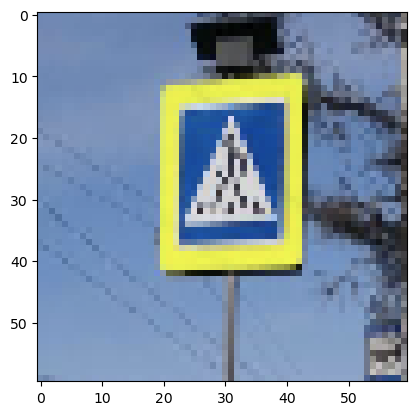

In [35]:
X_1image = []
image = 'C:/Users/kjh/Documents/images/road123.png'
img = cv2.imread(image) # Lecture de l'image dans le repertoire

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Conversion couleur RGB
img = cv2.resize(img, (60,60)) # Redimensionnement de l'image
X_1image.append(np.array(img)) # Conversion en tableau et ajout a la liste des images
X_1image = np.array(X_1image)
X_1image = X_1image/255

plt.imshow(X_1image[0])
prediction = np.argmax(model.predict(X_1image), axis=-1)

Classes[prediction[0]]

In [36]:
X_1image = []
image = 'C:/Users/kjh/AppData/Local/Temp/Rar$DI90.604/panneau_sens_interdit.png'
img = cv2.imread(image) # Lecture de l'image dans le repertoire

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Conversion couleur RGB
img = cv2.resize(img, (60,60)) # Redimensionnement de l'image
X_1image.append(np.array(img)) # Conversion en tableau et ajout a la liste des images
X_1image = np.array(X_1image)
X_1image = X_1image/255

plt.imshow(X_1image[0])
prediction = np.argmax(model.predict(X_1image), axis=-1)

Classes[prediction[0]]

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


1/1 [==============================] - 0s 31ms/step


'Dangerous curve right'

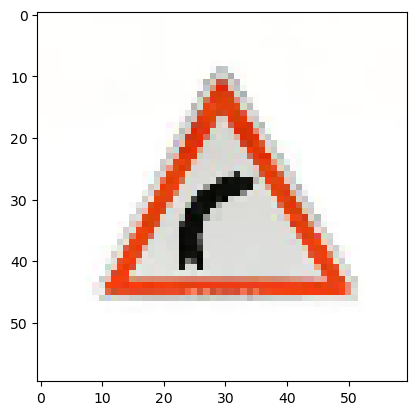

In [37]:
X_1image = []
image = 'C:/Users/kjh/Downloads/archive (4)/panneau_virage_droite.jpg'
img = cv2.imread(image) # Lecture de l'image dans le repertoire

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Conversion couleur RGB
img = cv2.resize(img, (60,60)) # Redimensionnement de l'image
X_1image.append(np.array(img)) # Conversion en tableau et ajout a la liste des images
X_1image = np.array(X_1image)
X_1image = X_1image/255

plt.imshow(X_1image[0])
prediction = np.argmax(model.predict(X_1image), axis=-1)

Classes[prediction[0]]

In [38]:
import matplotlib.pyplot as plt
import joblib
from skimage.feature import hog
from skimage.transform import pyramid_gaussian
import cv2
import glob
def sliding_window(image, window_size, step_size):
    for row in range(0, image.shape[0], step_size[0]):
        for col in range(0, image.shape[1], step_size[1]):
            yield (row, col, image[row:row + window_size[0], col:col + window_size[1]])

def resize_(img):
    height, width = img.shape[:2]
    if height > width:
        baseheight = 340
        hpercent = baseheight/float(height)
        wsize = int((float(width)*float(hpercent)))
        img = cv2.resize(img, (wsize, baseheight))
    else:
        basewidth = 340
        wpercent = (basewidth/float(width))
        hsize = int((float(height)*float(wpercent)))
        img = cv2.resize(img, (basewidth, hsize))

    return img


In [40]:


def find_object(test_image, clf):
    scale = 0
    detections = []
    downscale=1.25
    window_size = (64, 64)
    step_size = (12, 12)
    for test_image_pyramid in pyramid_gaussian(test_image, downscale=downscale, multichannel=False):
        if test_image_pyramid.shape[0] < window_size[0] or test_image_pyramid.shape[1] < window_size[1]:
            break
        for (row, col, sliding_image) in sliding_window(test_image_pyramid, window_size, step_size):
            if sliding_image.shape != window_size:
                continue
            sliding_image_hog = hog(sliding_image)
            sliding_image_hog = sliding_image_hog.reshape(1, -1)
            pred = clf.predict(sliding_image_hog)
           
            if pred==1:
                pred_prob = clf.decision_function(sliding_image_hog)
                (window_height, window_width) = window_size
                detections.append((int(col*downscale**scale), int(row*downscale**scale),
                        pred_prob[0], int(window_width*downscale**scale), int(window_height*downscale**scale)))
        scale+=1
    
    return detections



def draw_boxes(image, detections):
    if len(detections) == 0:
        return (0,0), (0,0)
    else:
        test_image_detect = image.copy()
        h, w = test_image_detect.shape[:2]
        for detection in detections:
            col = detection[0]
            row = detection[1]
            width = detection[3]
            height = detection[4]
            cv2.rectangle(test_image_detect, pt1=(col, row), pt2=(col+width, row+height), color=(255, 0, 0), thickness=2)
    #    plt.title('before NMS')
    #    plt.imshow(test_image_detect)
    #    plt.show()
        detection = max(detections,key=lambda item:item[2])
        col = detection[0]
        row = detection[1]
        width = detection[3]
        height = detection[4]
        p1 = (max(10,col), max(10,row))
        p2 = (min(w-10,col+width), min(h-10, row+height))

    return p1, p2


In [74]:
def get_object(img):
    
    image = cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB)

    if image.shape[0] > 340:
        image = resize_(image)
    im = image.copy()
    test_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    clf = joblib.load('modele_cnn_reconnaissance_panneaux_APR.h5')
    detections = find_object(test_image, clf)
    p1, p2 = draw_boxes(test_image, detections)
    if p1 == (0,0) and p2 == (0,0):
        return image, image, p1, p2
    else:
        cv2.rectangle(image, p1, p2, color=(0, 255, 0), thickness=4)
    #    plot.title('after NMS')
    #    plt.imshow(image)
    #    plt.axis('off')
    #    plt.show()
        return image, im[p1[1]:p2[1], p1[0]:p2[0]], p1, p2


SyntaxError: incomplete input (1466661591.py, line 11)

In [57]:
import flask
import werkzeug
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
from PIL import Image
from skimage import exposure, feature, transform, color
import joblib
#from random import randrange
import datetime
#from imutils.object_detection import non_max_suppression
#from detect import object_detection as od
#from detection import get_object
import warnings
warnings.filterwarnings('ignore')

app = flask.Flask(__name__)

@app.route('/', methods = ['GET', 'POST'])
def handle_request():
    
    imagefile = flask.request.files['image']
    filename = werkzeug.utils.secure_filename(imagefile.filename)
    print("\nReceived image File name : " + imagefile.filename)
    imagefile.save(filename)

    return prediction(filename)


In [70]:
def prediction(filename):
    ft = 'Combined'
    print(filename)
    image, crop, p1, p2 = get_object(filename)
    if p1 == (0,0) and p2 == (0,0):
        return "Aucun panneau detecté" + "==" + "no sign detected" 
#    im = Image.fromarray(crop)
#    im.save(filename)
#    img = plt.imread(filename)
    # plt.imshow(img)
    # plt.show()
    
    #img = np.array(img)
    else:
        X = get_features([crop], ft)
        X = np.array(X).astype("float")
        #X= X.reshape(-1, 1)
        #print(X.shape)
        # img = img.reshape(784)
        predicted_label = loaded_model.predict(X)
        # print(d[1])
        pred = int(predicted_label[0])
        res = str(pred) + "==" + str(p1[0]) + "==" + str(p1[1]) + "==" + str(p2[0])+ "==" + str(p2[1]) + "==" + str(image.shape[0]) + "==" + str(image.shape[1])
    return res

In [ ]:
def extract_HOG(img):
    (H, hog_img) = feature.hog(img, orientations=9, pixels_per_cell=(5,5),
    cells_per_block=(2, 2), transform_sqrt=True, visualise=True)
    hog_img = exposure.rescale_intensity(hog_img, out_range=(0, 255)).astype("uint8")
    return H

def extract_LBP(img):
    rows, cols = img.shape
    radius = 2
    n_points = radius * 8
    lbp_sum=[]
    rows_ = rows+(6-rows%6)
    cols_ = cols+(6-cols%6)
    I1 = np.zeros((rows_,cols_))
    I1[0:rows,0:cols] = img
    for i in range(6):
        for j in range(6):
            img_block = I1[7*i:7*(i+1),7*j:7*(j+1)]
            lbp = feature.local_binary_pattern(img_block, n_points, radius, 'uniform')
            lbp2 = lbp.astype(np.int32)
            max_bins = 59
            train_hist, _ = np.histogram(lbp2.ravel(), normed=True, bins=max_bins, range=(0, max_bins))
            lbp_sum=lbp_sum + train_hist.tolist()
    lbp_sum = np.array(lbp_sum)          
    return lbp_sum


def format_time(seconds):
    if seconds < 400:
        s = float(seconds)
        return "%.1f seconds" % (s,)
    elif seconds < 4000:
        m = seconds / 60.0
        return "%.2f minutes" % (m,)
    else:
        h = seconds / 3600.0
        return "%.2f hours" % (h,)

def cart_to_log_polar(img, T):
    img = img.astype(np.float32)
    h, w = img.shape[:2]
    maxRadius = math.hypot(w/2,h/2)
    m = w / math.log(maxRadius)
    polar_img = cv2.logPolar(img,(w/2, h/2), m/T, cv2.WARP_FILL_OUTLIERS+ cv2.INTER_LINEAR)
    return polar_img

def get_features(X, f):
    
    print("[INFO] Extraction of Features...")
    start_time = datetime.datetime.now()
    feat = []
    for i in range(len(X)):
        # show an update every 1,000 images
        if i > 0 and i % 10 == 0:
            print("[INFO] processed {}/{}".format(i, len(X)))
        I = X[i]
        grayim = color.rgb2gray(I)
        grayim = transform.resize(grayim,(40,40))
        grayim = cart_to_log_polar(grayim,0.8)
        if f == 'HoG':
            feat.append(extract_HOG(grayim))
        elif f == 'LBP':
            feat.append(extract_LBP(grayim))
        else:
            feat.append(np.hstack([extract_HOG(grayim), extract_LBP(grayim)]))
        # save the features using numpy save with .npy extention 
        # which reduced the storage space by 4times compared to pickle
    end_time = datetime.datetime.now()
    dt = end_time - start_time
    seconds = dt.total_seconds()
    t = format_time(seconds)    
    print("total_time : ",t)
    # feat = np.array(feat)
    # print(feat.shape)
    return feat

if __name__ == "__main__":
    clf = model.save('modele_cnn_reconnaissance_panneaux_APR.h5')
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


In [78]:
import tensorflow as tf
model=tf.keras.models.load_model('modele_cnn_reconnaissance_panneaux_APR.h5')

In [89]:
from flask import Flask, request, jsonify
import tensorflow as tf
import numpy as np



# Charger le modèle préalablement entraîné
model = tf.keras.models.load_model('modele_cnn_reconnaissance_panneaux_APR.h5')
app = flask.Flask(__name__)
@app.route('/', methods = ['GET', 'POST'])

def predict():
    # Récupérer l'image envoyée par l'utilisateur
    image = request.files['image'].read()
    image = tf.image.decode_image(image)
    image = tf.image.resize(image, [224, 224])  # Adapter à la taille d'entrée du modèle
    image = np.expand_dims(image, axis=0)
    
    # Effectuer l'inférence avec le modèle
    predictions = model.predict(image)
    return jsonify(predictions.tolist())

if __name__ == '_main_':
    app.run()